Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2017/2018  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.2  
Zadnji put ažurirano: 30. listopada 2017.*

(c) 2015-2017 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. listopada 2017.**  
Rok za predaju: **6. studenog 2017. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [44]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])
#seven_y = np.array([1, 1, 1, 1, -1, -1, -1])

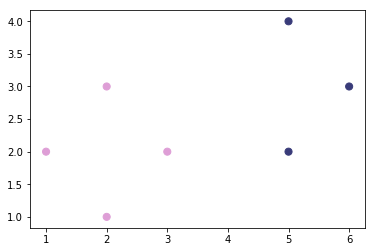

In [45]:
# Vaš kôd ovdje...
mlutils.plot_2d_clf_problem(seven_X, seven_y)

Točnost: 1.0
Težine: 2.1 [-0.5 -0.1]


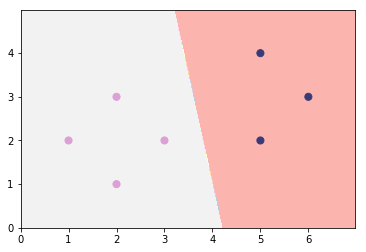

In [46]:
ridgeClassifier = RidgeClassifier(alpha=0)
ridgeClassifier.fit(seven_X, seven_y)


mlutils.plot_2d_clf_problem(seven_X, seven_y, ridgeClassifier.predict)

seven_y_pred = ridgeClassifier.predict(seven_X)

print("Točnost: " + str(accuracy_score(seven_y, seven_y_pred)))
print("Težine: " + str(ridgeClassifier.intercept_[0]) + " " + str(ridgeClassifier.coef_[0]))

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

Točnost: 1.0
Težine: 1.55 [-0.25 -0.05]


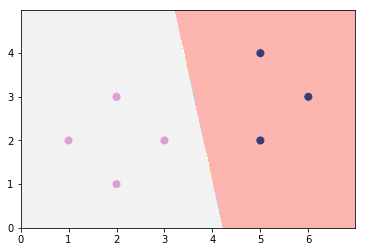

In [47]:
# Vaš kôd ovdje...
linearRegression = LinearRegression()
linearRegression.fit(seven_X, seven_y)

hl = lambda x : linearRegression.predict(x) >= 0.5

mlutils.plot_2d_clf_problem(seven_X, seven_y, hl)

seven_y_pred = hl(seven_X)
print("Točnost: " + str(accuracy_score(seven_y, seven_y_pred)))
print("Težine: " + str(linearRegression.intercept_) + " " + str(linearRegression.coef_))

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [48]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

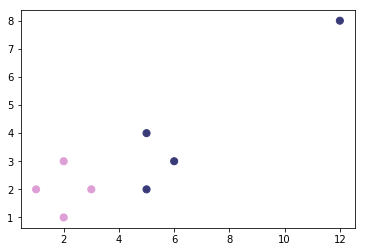

In [49]:
# Vaš kôd ovdje...
mlutils.plot_2d_clf_problem(outlier_X, outlier_y)

Točnost: 0.875


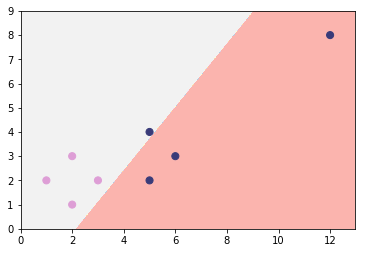

In [50]:
ridgeClassifier = RidgeClassifier(alpha=0)
ridgeClassifier.fit(outlier_X, outlier_y)

mlutils.plot_2d_clf_problem(outlier_X, outlier_y, ridgeClassifier.predict)

outlier_y_pred = ridgeClassifier.predict(outlier_X)

print("Točnost: " + str(accuracy_score(outlier_y, outlier_y_pred)))

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [51]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

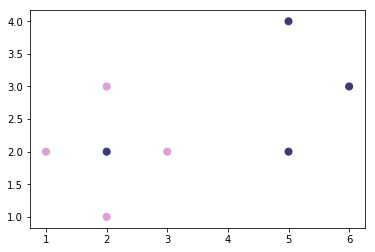

In [52]:
# Vaš kôd ovdje...
mlutils.plot_2d_clf_problem(unsep_X, unsep_y)

Točnost: 0.875


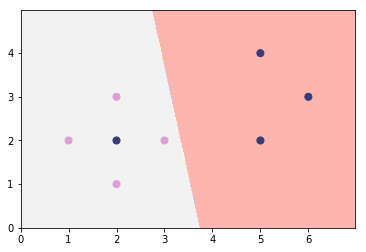

In [53]:
ridgeClassifier = RidgeClassifier(alpha=0)
ridgeClassifier.fit(unsep_X, unsep_y)

mlutils.plot_2d_clf_problem(unsep_X, unsep_y, ridgeClassifier.predict)

unsep_y_pred = ridgeClassifier.predict(unsep_X)

print("Točnost: " + str(accuracy_score(unsep_y, unsep_y_pred)))

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

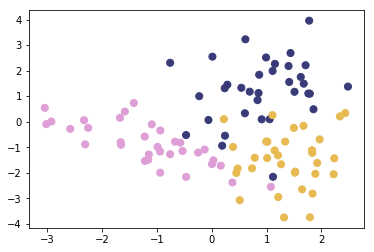

In [54]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje...

ovr_X, ovr_y = make_classification(n_samples=100, n_features=2, n_informative=2,
                                   n_redundant=0, n_repeated=0, n_classes=3,
                                   n_clusters_per_class=1, class_sep=1.0) #class_sep=2.0

mlutils.plot_2d_clf_problem(ovr_X, ovr_y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

In [55]:
def separate_labels_for_one_class(y, class_idx):
    new_y = np.copy(y)
    new_y[new_y!=class_idx] = -1
    new_y[new_y==class_idx] = 1
    new_y[new_y==-1] = 0
    return new_y

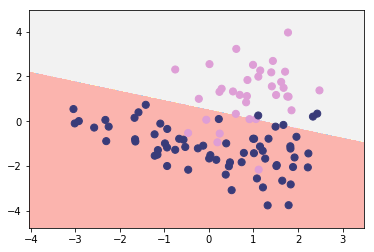

In [57]:
ovr_y_0 = separate_labels_for_one_class(ovr_y, 0)
linearRegression_0 = LinearRegression()
linearRegression_0.fit(ovr_X, ovr_y_0)

hl = lambda x : linearRegression_0.predict(x) >= 0.5

mlutils.plot_2d_clf_problem(ovr_X, ovr_y_0, hl)

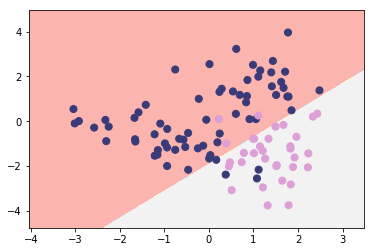

In [58]:
ovr_y_1 = separate_labels_for_one_class(ovr_y, 1)
linearRegression_1 = LinearRegression()
linearRegression_1.fit(ovr_X, ovr_y_1)

hl = lambda x : linearRegression_1.predict(x) >= 0.5


mlutils.plot_2d_clf_problem(ovr_X, ovr_y_1, hl)

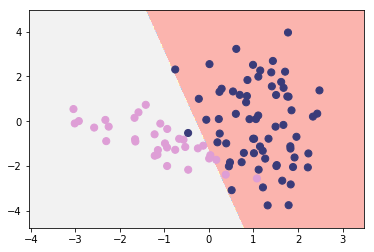

In [59]:
ovr_y_2 = separate_labels_for_one_class(ovr_y, 2)
linearRegression_2 = LinearRegression()
linearRegression_2.fit(ovr_X, ovr_y_2)

hl = lambda x : linearRegression_2.predict(x) >= 0.5

mlutils.plot_2d_clf_problem(ovr_X, ovr_y_2, hl)

In [60]:
class BinomialToMultiClass:

    def __init__(self, linearRegresionModels=None):
        self.linearRegresionModels = linearRegresionModels
    
    def predict(self, X):
        pred = self.linearRegresionModels[0].predict(X)
        for l in self.linearRegresionModels[1:]:
            pred = np.vstack([pred, l.predict(X)])
        return np.argmax(pred, axis=0)

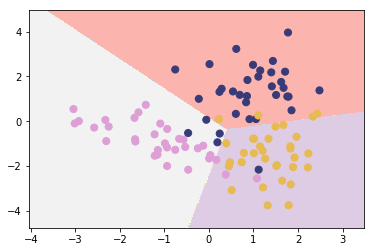

In [61]:
multi_class_lin_reg = BinomialToMultiClass(linearRegresionModels=[linearRegression_0, linearRegression_1, linearRegression_2])
mlutils.plot_2d_clf_problem(ovr_X, ovr_y, multi_class_lin_reg.predict)
#multi_class_lin_reg.predict(ovr_X)

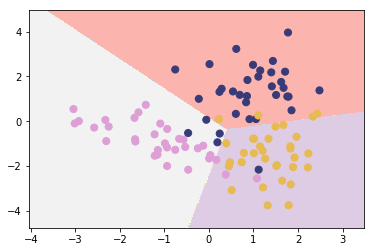

In [62]:
ridgeClassifier = RidgeClassifier(alpha=0)
ridgeClassifier.fit(ovr_X,ovr_y)

mlutils.plot_2d_clf_problem(ovr_X, ovr_y, ridgeClassifier.predict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [64]:
# Vaš kôd ovdje...
def sigmoid(X, alpha=1):
    return 1 / (1 + exp(-alpha * X))

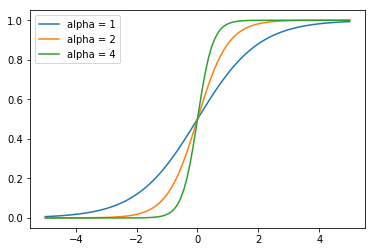

In [65]:
X = linspace(-5, 5, 100)

for i in [1,2,4]:
    plt.plot(X,sigmoid(X,i), label="alpha = " + str(i))

plt.legend(loc="best")
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [23]:
def lr_h(x,w):
    return sigmoid(w[0] + np.dot(w[1:,:].T, x.T))

In [24]:
def cross_entropy_error(X,y,w):
    N = X.shape[0]
    error_sum = 0
    
    for i in range(0,N):
        x = X[i,]
        h = lr_h(x,w)
        
        error_sum += y[i] * np.log(h) + (1 - y[i]) * np.log(1 - h)
    
    error_sum *= -1
    error_sum /= N
    return error_sum

In [25]:
# Vaš kôd ovdje...
def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    N = X.shape[0]
    n = X.shape[1]
    w = np.zeros((n + 1,1)) #inicijaliziranje vektora težina na 0
    
    iter_num = 1
    last_error = cross_entropy_error(X, y, w)
    
    if trace:
        w_trace = np.array(w.T)
        
    while(iter_num <= max_iter):
        iter_num += 1
        
        dw0 = 0
        dw = np.zeros((n,1))
        
        for i in range (0, N):
            h = lr_h(X[i], w)
            dw0 += h - y[i]
            dw += ((h[0] - y[i]) * X[i,]).reshape(-1,1) 
        
        w[0] = w[0]  - eta * dw0
        w[1:] = w[1:] * (1 - eta * alpha) - eta * dw
        
        if trace:
            w_trace = np.vstack([w_trace,w.T])
        
        current_error = cross_entropy_error(X, y, w)
        if(abs(current_error - last_error) < epsilon):
            break
        else:
            last_error = current_error
    print("Last iteration: " + str(iter_num))
    if trace:
        return w, w_trace
    return w

#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

Last iteration: 948
Cross-entropy error: 0.135218727202


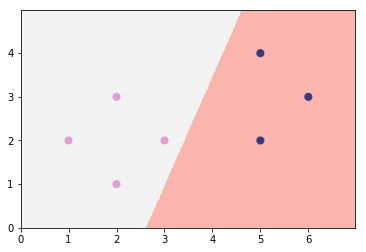

In [26]:
# Vaš kôd ovdje...
w = lr_train(seven_X, seven_y, eta=0.01, max_iter=2000)#_dummy

ha = lambda x : lr_h(x, w) >= 0.5
mlutils.plot_2d_clf_problem(seven_X, seven_y, ha)

error = cross_entropy_error(seven_X, seven_y, w)
print("Cross-entropy error: " + str(error[0]))

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [27]:
def classification_error(X,y,w):
    N = X.shape[0]
    error_sum = 0
    
    for i in range(0,N):
        x = X[i,]
        h = (lr_h(x,w) > 0.5) * 1
        
        error_sum += abs(y[i] - h)
        
    error_sum = error_sum[0]
    error_sum /= N
    return error_sum

Last iteration: 948


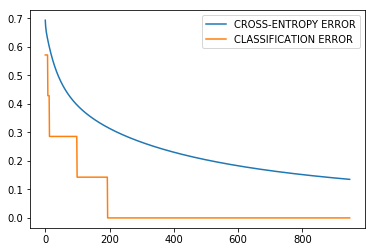

In [28]:
w_n, w_trace = lr_train(seven_X, seven_y, eta=0.01, max_iter=2000, trace=True)

iteration = range(0, w_trace.shape[0])
cee = [] #cross-entropy error
ce = []  #classification error

for i in iteration:
    w = w_trace[i].reshape(-1,1)
    cee.append(cross_entropy_error(seven_X, seven_y, w))
    ce.append(classification_error(seven_X, seven_y, w))
    
plt.plot(iteration, cee, label="CROSS-ENTROPY ERROR")
plt.plot(iteration, ce, label="CLASSIFICATION ERROR")
plt.legend(loc="best")
plt.show()

Last iteration: 1143
Last iteration: 948
Last iteration: 512
Last iteration: 379


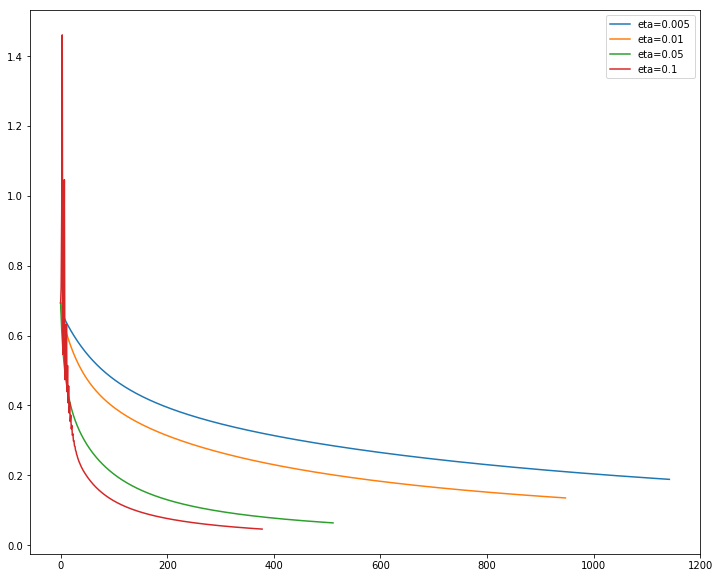

In [29]:
plt.figure(figsize=(12,10))
for eta in [0.005,0.01,0.05,0.1]:
    w_n, w_trace = lr_train(seven_X, seven_y, eta=eta, max_iter=2000, trace=True)

    iteration = range(0, w_trace.shape[0])
    cee = [] #cross-entropy error
    
    for i in iteration:
        w = w_trace[i].reshape(-1,1)
        cee.append(cross_entropy_error(seven_X, seven_y, w))
        
    plt.plot(iteration, cee, label="eta=" + str(eta))

plt.legend(loc="best")
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

Last iteration: 6
Weights: [ 8.27765062 -2.44484337  0.35101133]
Cross-entropy error: 0.0474127727699


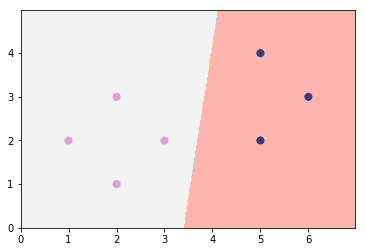

In [30]:
from sklearn.linear_model import LogisticRegression

# Vaš kôd ovdje...
logisticRegression = LogisticRegression(C=100) #regularization power??
logisticRegression.fit(seven_X, seven_y)

mlutils.plot_2d_clf_problem(seven_X, seven_y, logisticRegression.predict)
print("Last iteration: " + str(logisticRegression.n_iter_[0]))

w = np.hstack([logisticRegression.intercept_[0], logisticRegression.coef_[0]]).reshape(-1,1)
print("Weights: " + str(w.T[0]))

error = cross_entropy_error(seven_X, seven_y, w)
print("Cross-entropy error: " + str(error[0]))

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

Last iteration: 6
Weights: [ 3.4807952  -1.35427564  0.52758618]
Cross-entropy error: 0.181701018692


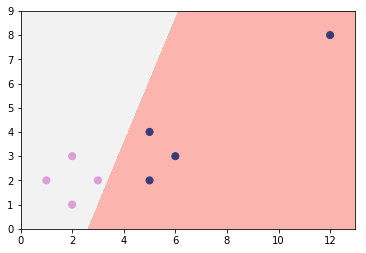

In [31]:
# Vaš kôd ovdje...
logisticRegression = LogisticRegression(C=10)
logisticRegression.fit(outlier_X, outlier_y)

mlutils.plot_2d_clf_problem(outlier_X, outlier_y, logisticRegression.predict)
print("Last iteration: " + str(logisticRegression.n_iter_[0]))

w = np.hstack([logisticRegression.intercept_[0], logisticRegression.coef_[0]]).reshape(-1,1)
print("Weights: " + str(w.T[0]))

error = cross_entropy_error(seven_X, seven_y, w)
print("Cross-entropy error: " + str(error[0]))

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


Last iteration: 948


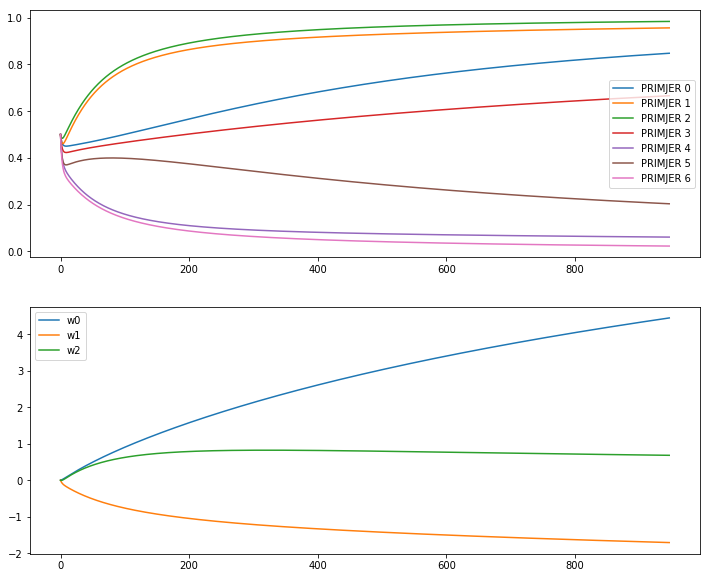

In [32]:
# Vaš kôd ovdje...
plt.figure(figsize=(12,10))

w_n, w_trace = lr_train(seven_X, seven_y, eta=0.01, max_iter=2000, trace=True)

iteration = range(0, w_trace.shape[0])
h_i = np.empty((seven_X.shape[0],0))
for i in iteration:
    w = w_trace[i].reshape(-1,1)
    h_tmp = lr_h(seven_X, w)
    h_i = np.hstack([h_i,h_tmp.T])

plt.subplot(2,1,1)
for i in range(0,h_i.shape[0]):
    plt.plot(iteration, h_i[i], label="PRIMJER " + str(i))

plt.legend(loc="best")
    
plt.subplot(2,1,2)
for i in range(0,w_trace.shape[1]):
    plt.plot(iteration, w_trace[:,i], label="w" + str(i))

plt.legend(loc="best")
plt.show()

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

Last iteration: 455


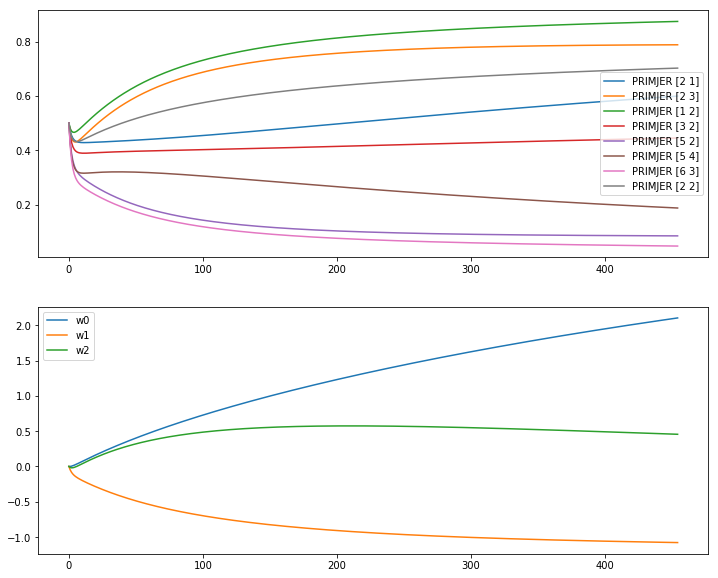

In [33]:
# Vaš kôd ovdje...
plt.figure(figsize=(12,10))

w_n, w_trace = lr_train(unsep_X, unsep_y, eta=0.01, max_iter=2000, trace=True)

iteration = range(0, w_trace.shape[0])
h_i = np.empty((unsep_X.shape[0],0))
for i in iteration:
    w = w_trace[i].reshape(-1,1)
    h_tmp = lr_h(unsep_X, w)
    h_i = np.hstack([h_i,h_tmp.T])

plt.subplot(2,1,1)
for i in range(0,h_i.shape[0]):
    plt.plot(iteration, h_i[i], label="PRIMJER " + str(unsep_X[i]))

plt.legend(loc="best")
    
plt.subplot(2,1,2)
for i in range(0,w_trace.shape[1]):
    plt.plot(iteration, w_trace[:,i], label="w" + str(i))

plt.legend(loc="best")
plt.show()

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [34]:
from numpy.linalg import norm

In [35]:
def L2_norm(w):
    w_tmp = w[1:]
    return sqrt(np.dot(w_tmp.T, w_tmp))

Last iteration: 948


C:\Users\Marin\Anaconda2\envs\py36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Last iteration: 805
Last iteration: 406
Last iteration: 5


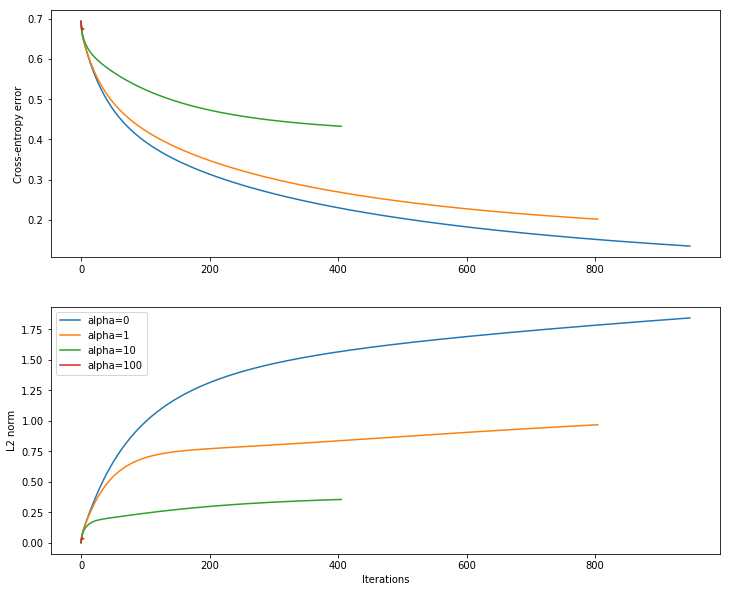

Last iteration: 5


In [36]:
# Vaš kôd ovdje...
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.ylabel("Cross-entropy error")
    
plt.subplot(2,1,2)
plt.ylabel("L2 norm")
plt.xlabel("Iterations")

for alpha in [0,1,10,100]:
    w_n, w_trace = lr_train(seven_X, seven_y, alpha=alpha, max_iter=2000, trace=True)

    iteration = range(0, w_trace.shape[0])
    
    cee = [] #cross-entropy error
    l2norm = [] #L2 norm
    for i in iteration:
        w = w_trace[i].reshape(-1,1)
        cee.append(cross_entropy_error(seven_X, seven_y, w))
        l2norm.append(norm(w[1:], 2))#L2_norm(w)[0][0]
    
    plt.subplot(2,1,1)
    plt.plot(iteration, cee, label="alpha=" + str(alpha))
    
    plt.subplot(2,1,2)
    plt.plot(iteration, l2norm, label="alpha=" + str(alpha))

plt.legend(loc="best")
plt.show()
w_n, w_trace = lr_train(seven_X, seven_y, alpha=alpha, max_iter=2000, trace=True)
    

Last iteration: 406


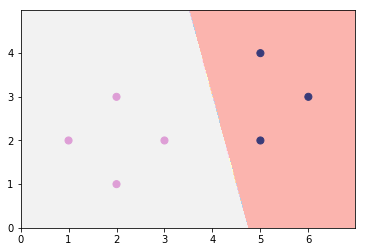

In [37]:
w_n, w_trace = lr_train(seven_X, seven_y, alpha=10, max_iter=2000, trace=True)

ha = lambda x : lr_h(x, w_n) >= 0.5
mlutils.plot_2d_clf_problem(seven_X, seven_y, ha)

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

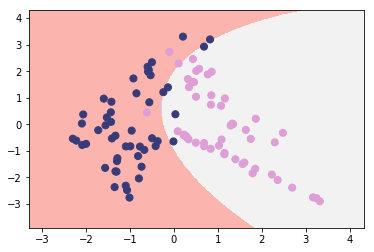

In [38]:
from sklearn.preprocessing import PolynomialFeatures

#non_lineary separable
nls_X, nls_y = make_classification(n_samples=100, n_features=2, n_informative=2,
                                   n_redundant=0, n_repeated=0, n_classes=2,
                                   n_clusters_per_class=2, class_sep=1.0)

poly = PolynomialFeatures(2)
nls_X_d2 = poly.fit_transform(nls_X)

logReg_d2 = LogisticRegression()
logReg_d2.fit(nls_X_d2, nls_y)

mlutils.plot_2d_clf_problem(nls_X, nls_y, lambda x : logReg_d2.predict(poly.transform(x)))

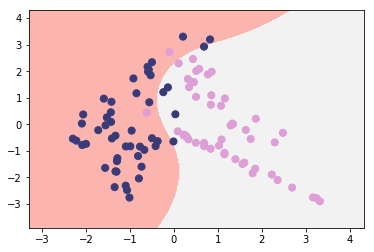

In [39]:
# Vaš kôd ovdje...
poly = PolynomialFeatures(3)
nls_X_d3 = poly.fit_transform(nls_X)

logReg_d3 = LogisticRegression()
logReg_d3.fit(nls_X_d3, nls_y)

mlutils.plot_2d_clf_problem(nls_X, nls_y, lambda x : logReg_d3.predict(poly.transform(x)))

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?